In [ ]:
#!wget http://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI-T1.tar --continue
!wget http://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI-T2.tar --continue

--2022-09-18 14:45:49--  http://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI-T2.tar
Resolving biomedic.doc.ic.ac.uk (biomedic.doc.ic.ac.uk)... 146.169.22.31
Connecting to biomedic.doc.ic.ac.uk (biomedic.doc.ic.ac.uk)|146.169.22.31|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI-T2.tar [following]
--2022-09-18 14:45:50--  https://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI-T2.tar
Connecting to biomedic.doc.ic.ac.uk (biomedic.doc.ic.ac.uk)|146.169.22.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3853445120 (3.6G) [application/x-tar]
Saving to: ‘IXI-T2.tar’

IXI-T2.tar          100%[===================>]   3.59G  36.4MB/s    in 1m 41s  

2022-09-18 14:47:31 (36.3 MB/s) - ‘IXI-T2.tar’ saved [3853445120/3853445120]



## T2

In [ ]:
!wget http://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI.xls

URL transformed to HTTPS due to an HSTS policy
--2022-09-18 14:47:32--  https://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI.xls
Resolving biomedic.doc.ic.ac.uk (biomedic.doc.ic.ac.uk)... 146.169.22.31
Connecting to biomedic.doc.ic.ac.uk (biomedic.doc.ic.ac.uk)|146.169.22.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210432 (206K) [application/vnd.ms-excel]
Saving to: ‘IXI.xls’

IXI.xls             100%[===================>] 205.50K   661KB/s    in 0.3s    

2022-09-18 14:47:32 (661 KB/s) - ‘IXI.xls’ saved [210432/210432]



In [ ]:
#!tar -xvf IXI-T1.tar
!tar -xvf IXI-T2.tar
!rm IXI-T2.tar

IXI002-Guys-0828-T2.nii.gz
IXI012-HH-1211-T2.nii.gz
IXI013-HH-1212-T2.nii.gz
IXI014-HH-1236-T2.nii.gz
IXI015-HH-1258-T2.nii.gz
IXI016-Guys-0697-T2.nii.gz
IXI017-Guys-0698-T2.nii.gz
IXI019-Guys-0702-T2.nii.gz
IXI020-Guys-0700-T2.nii.gz
IXI021-Guys-0703-T2.nii.gz
IXI022-Guys-0701-T2.nii.gz
IXI023-Guys-0699-T2.nii.gz
IXI024-Guys-0705-T2.nii.gz
IXI025-Guys-0852-T2.nii.gz
IXI026-Guys-0696-T2.nii.gz
IXI027-Guys-0710-T2.nii.gz
IXI028-Guys-1038-T2.nii.gz
IXI029-Guys-0829-T2.nii.gz
IXI030-Guys-0708-T2.nii.gz
IXI031-Guys-0797-T2.nii.gz
IXI033-HH-1259-T2.nii.gz
IXI034-HH-1260-T2.nii.gz
IXI035-IOP-0873-T2.nii.gz
IXI036-Guys-0736-T2.nii.gz
IXI037-Guys-0704-T2.nii.gz
IXI038-Guys-0729-T2.nii.gz
IXI039-HH-1261-T2.nii.gz
IXI040-Guys-0724-T2.nii.gz
IXI041-Guys-0706-T2.nii.gz
IXI042-Guys-0725-T2.nii.gz
IXI043-Guys-0714-T2.nii.gz
IXI044-Guys-0712-T2.nii.gz
IXI045-Guys-0713-T2.nii.gz
IXI046-Guys-0824-T2.nii.gz
IXI048-HH-1326-T2.nii.gz
IXI049-HH-1358-T2.nii.gz
IXI050-Guys-0711-T2.nii.gz
IXI051-HH-1328-T2.ni

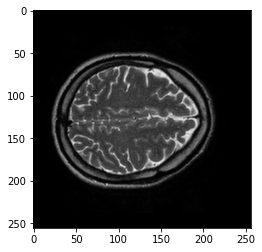

In [ ]:
import nibabel
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(np.flipud(nibabel.load('IXI626-Guys-1094-T2.nii.gz').get_fdata())[:,:,100], cmap='gray')
# arr = np.flipud(arr)

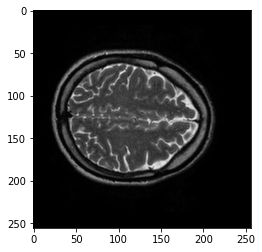

In [ ]:
plt.imshow(nibabel.load('IXI626-Guys-1094-T2.nii.gz').get_fdata()[:,:,100], cmap='gray')


In [ ]:
!pip install -U xlrd==2.0.1
!pip install torchio
import torchio as tio
import pandas as pd
data_labels = pd.read_excel('IXI.xls', index_col='IXI_ID').loc[:, 'AGE']
data_labels.drop_duplicates(inplace=True, )

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 5.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 172 kB 23.7 MB/s 
     |████████████████████████████████| 52.8 MB 138 kB/s 


In [ ]:
mkint = lambda x: int(x) if not np.isnan(x) else x
data_labels = data_labels.apply(mkint)
minclass = np.min(data_labels)
numclass = np.max(data_labels) - np.min(data_labels) + 1

In [ ]:
import re
import os
import nibabel
from natsort import natsorted, ns
lst = []
for file in os.listdir():
    try:
        id = int(re.findall('IXI(\d+).*nii\.gz', file)[0])
    except:
        id = -1
    if 'nii.gz' in file and id in data_labels: #and nibabel.load(file).shape == (256, 256, 150):
        lst.append(file)
lst = natsorted(lst)

In [ ]:
from sklearn.model_selection import train_test_split
train_index, test_index = train_test_split(lst, train_size=0.85, random_state=41)

In [ ]:
tensor_bias = None
nontype = type(None)
for file in train_index:
    im = tio.ScalarImage(file)
    transform = tio.CropOrPad((256,256,150))
    output = transform(im)
    arr = output.numpy().reshape(256, 256, 150)
    tensor_bias = arr.copy() if type(tensor_bias) == nontype else tensor_bias + arr

In [ ]:
mean = tensor_bias.mean() / len(train_index)
std = tensor_bias.std()/len(train_index)

In [ ]:
import nibabel
import pickle
import numpy as np
import skimage.transform as skTrans

batch_size = 3
for j, dat in enumerate([train_index, test_index]):
    labels = []
    name = 'train' if j == 0 else 'test'
    res = {}
    for i, file in enumerate(dat):
        if i % batch_size == 0 and i != 0:
            fileid = i // batch_size
            with open('%s chunk%d.pk' % (name, fileid), 'wb') as f:
                pickle.dump([res, labels], f)
            res = {}
            labels = []
            print('%s chunk%d done' % (name, fileid))
        id = int(re.findall('IXI(\d+).*nii\.gz', file)[0])
        try:
            val = float(data_labels[id])
        except:
            print(id)
            val = float(data_labels[id].values[0])
        labels.append(val)
        im = tio.ScalarImage(file)
        transform = tio.CropOrPad((256,256,150))
        output = transform(im)
        arr = output.numpy().reshape(256, 256, 150)
        arr = skTrans.resize(arr, (150,150,89), order=1, preserve_range=True)
        res[file] = (arr.copy() - mean) / std
        del im
        del arr
    with open('%s chunk%d.pk' % (name, (fileid + 1)), 'wb') as f:
        pickle.dump([res, labels], f)
    print('%s chunk%d done' % (name, fileid+1))
    

train chunk1 done
train chunk2 done
train chunk3 done
train chunk4 done
train chunk5 done
train chunk6 done
train chunk7 done
train chunk8 done
train chunk9 done
train chunk10 done
train chunk11 done
train chunk12 done
train chunk13 done
train chunk14 done
train chunk15 done
train chunk16 done
train chunk17 done
train chunk18 done
train chunk19 done
train chunk20 done
train chunk21 done
train chunk22 done
train chunk23 done
train chunk24 done
train chunk25 done
train chunk26 done
train chunk27 done
train chunk28 done
train chunk29 done
train chunk30 done
train chunk31 done
train chunk32 done
train chunk33 done
train chunk34 done
train chunk35 done
train chunk36 done
train chunk37 done
train chunk38 done
train chunk39 done
train chunk40 done
train chunk41 done
train chunk42 done
train chunk43 done
train chunk44 done
train chunk45 done
train chunk46 done
train chunk47 done
train chunk48 done
train chunk49 done
train chunk50 done
train chunk51 done
train chunk52 done
train chunk53 done
tr

In [ ]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv3d(1, 32, (3,3,3), padding=1)
        self.conv2 = nn.Conv3d(32, 64, (3,3,3), padding=1)
        self.conv3 = nn.Conv3d(64, 128, (3,3,3), padding=1)
        self.conv4 = nn.Conv3d(128, 256, (3,3,3), padding=1)
        self.conv5 = nn.Conv3d(256, 256, (3,3,3), padding=1)
        self.conv6 = nn.Conv3d(256, 64, (1,1,1), padding=1)
        self.conv7 = nn.Conv3d(64, 40, (1,1,1), padding=1)
        self.flatten = nn.Flatten()
        self.batch1 = nn.BatchNorm3d(32)
        self.batch2 = nn.BatchNorm3d(64)
        self.batch3 = nn.BatchNorm3d(128)
        self.batch4 = nn.BatchNorm3d(256)
        self.batch5 = nn.BatchNorm3d(256)
        self.batch6 = nn.BatchNorm3d(64)
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool3d((2,2,2))
        self.maxpool2 = nn.MaxPool3d((2,2,2))
        self.maxpool3 = nn.MaxPool3d((2,2,2))
        self.maxpool4 = nn.MaxPool3d((2,2,2))
        self.maxpool5 = nn.MaxPool3d((2,2,2))
        self.avgpool1 = nn.AvgPool3d((2,2,2))
        self.dense = nn.Linear(4000, int(numclass))
        self.dropout = nn.Dropout3d(0.5)
        self.softmax = nn.Softmax(dim=1)
    def forward(self, X):
        x = self.conv1(X)
        x = self.batch1(x)
        x = self.maxpool1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.batch2(x)
        x = self.maxpool2(x)
        x = self.relu(x)

        x = self.conv3(x)
        x = self.batch3(x)
        x = self.maxpool3(x)
        x = self.relu(x)

        x = self.conv4(x)
        x = self.batch4(x)
        x = self.maxpool4(x)
        x = self.relu(x)

        x = self.conv5(x)
        x = self.batch5(x)
        x = self.maxpool5(x)
        x = self.relu(x)

        x = self.conv6(x)
        x = self.batch6(x)
        x = self.relu(x)
        x = self.avgpool1(x)
        x = self.dropout(x)

        x = self.conv7(x)
        x = x.reshape(x.shape[0], -1)
        x = self.dense(x)
        x = self.softmax(x)
        return x


In [ ]:
## this scope should be run before load the model from disk
net = Net()
net = net.cuda()
adam = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0.95)
mae_loss= nn.L1Loss(reduction='mean')
scheduler = torch.optim.lr_scheduler.ExponentialLR(adam, gamma=0.3)


In [ ]:
####### save model
# torch.save(net.state_dict(), 'net.torch')

net = net.load_state_dict(torch.load('net.torch'))

In [ ]:
import os
train_files = []
for file in os.listdir():
    if 'train' in file:
        train_files.append(file)
train_files.sort()
test_files = []
for file in os.listdir():
    if 'test' in file:
        test_files.append(file)
test_files.sort()

In [ ]:
import pickle
import numpy as np
import gc
import time

losses = []
for epoch in range(100):
    if epoch % 30 == 0 and epoch != 0:
        scheduler.step()
    loss_val = 0
    iters = 0
    print("epoch %d:" % epoch)
    st = time.time()
    net.train()
    for i, file in enumerate(train_files):
        adam.zero_grad()
        with open(file, 'rb') as f:
            dt = pickle.load(f)
        train_chunk = torch.tensor(np.stack(list(dt[0].values()), axis=0).reshape(-1, 1, 150, 150, 89), dtype=torch.float32).cuda()
        train_labels = torch.tensor(np.array(dt[1]).reshape(-1,1)).cuda()
        outputs = net(train_chunk)
        loss = mae_loss(torch.max(outputs, dim=1)[1].float().requires_grad_().reshape(-1), train_labels.reshape(-1))
        loss.backward()
        loss_val += loss
        adam.step()
        del train_chunk
        del train_labels
        del dt
        gc.collect()
        torch.cuda.empty_cache()
        iters += 1
    ed = time.time()
    lvl = loss_val / iters
    losses.append(lvl)
    lr = adam.param_groups[0]["lr"]
    print("elapsed time for epoch %d is %.2f minute" % (epoch, (ed - st) / 60))
    print('loss for training dataset is %f with %f lr \n' %  (lvl, lr))

    net.eval()
    loss_val = 0
    iters = 0
    for i, file in enumerate(test_files):
        with open(file, 'rb') as f:
            dt = pickle.load(f)
        test_chunk= torch.tensor(np.stack(list(dt[0].values()), axis=0).reshape(-1, 1, 150, 150, 89), dtype=torch.float32).cuda()
        test_labels= torch.tensor(np.array(dt[1]).reshape(-1,1)).cuda()
        with torch.no_grad():
            outputs = net(test_chunk)
            loss = mae_loss(torch.max(outputs, dim=1)[1].float().reshape(-1), test_labels.reshape(-1))
        loss_val += loss
        del test_chunk 
        del test_labels
        del dt
        gc.collect()
        torch.cuda.empty_cache()
        iters += 1
    lvl = loss_val / iters
    losses.append(lvl)
    print('loss for test dataset is %f \n' % lvl)

epoch 0:
elapsed time for epoch 0 is 0.99 minute
loss for training dataset is 30.230267 with 0.001000 lr 

loss for test dataset is 32.938271 

epoch 1:


KeyboardInterrupt: ignored

In [ ]:
import gc
import pickle
Y = []
Y_pred = []
losses = []
net.eval()
loss_val = 0
iters = 0
for i, file in enumerate(test_files):
    with open(file, 'rb') as f:
        dt = pickle.load(f)
    test_chunk= torch.tensor(np.stack(list(dt[0].values()), axis=0).reshape(-1, 1, 150, 150, 89), dtype=torch.float32).cuda()
    test_labels= torch.tensor(np.array(dt[1]).reshape(-1,1)).cuda()
    with torch.no_grad():
        outputs = net(test_chunk)
        loss = mae_loss(torch.max(outputs, dim=1)[1].float().reshape(-1), test_labels.reshape(-1))
    Y.extend([int(i) for i in test_labels])
    Y_pred.extend([int(i) for i in torch.max(outputs, dim=1)[1].float()])
    loss_val += loss
    del test_chunk 
    del test_labels
    del dt
    gc.collect()
    torch.cuda.empty_cache()
    iters += 1
lvl = loss_val / iters
losses.append(lvl)
print('loss for test dataset is %f \n' % lvl)

FileNotFoundError: ignored

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(12,9))
cf_matrix = confusion_matrix(Y_pred, Y)
sns.heatmap(cf_matrix, annot=True, xticklabels=set(Y), yticklabels=set(Y_pred))
plt.xlabel("True Label")
plt.ylabel("Pred Label")

In [ ]:
net = Net()
net = net.cuda()
adam = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0.95)
mae_loss= nn.L1Loss(reduction='mean')
scheduler = torch.optim.lr_scheduler.ExponentialLR(adam, gamma=0.3)

In [ ]:
####### save model
# torch.save(net.state_dict(), 'net.torch')
# net = Net()
net.load_state_dict(torch.load('net.torch'))
net = net.cuda()

## **CMU_a**

In [ ]:
!wget https://fcp_private.projects.nitrc.org/downloads/abide_mrdata_r01_release/ImagingData/CMU_a.tgz

--2022-09-18 14:58:19--  https://fcp_private.projects.nitrc.org/downloads/abide_mrdata_r01_release/ImagingData/CMU_a.tgz
Resolving fcp_private.projects.nitrc.org (fcp_private.projects.nitrc.org)... 52.3.190.103
Connecting to fcp_private.projects.nitrc.org (fcp_private.projects.nitrc.org)|52.3.190.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 550902922 (525M) [application/x-gzip]
Saving to: ‘CMU_a.tgz’

CMU_a.tgz           100%[===================>] 525.38M   282MB/s    in 1.9s    

2022-09-18 14:58:21 (282 MB/s) - ‘CMU_a.tgz’ saved [550902922/550902922]



In [ ]:
!wget https://fcp_private.projects.nitrc.org/downloads/abide_mrdata_r01_release/PhenotypicData/phenotypic_CMU.csv

--2022-09-18 14:58:14--  https://fcp_private.projects.nitrc.org/downloads/abide_mrdata_r01_release/PhenotypicData/phenotypic_CMU.csv
Resolving fcp_private.projects.nitrc.org (fcp_private.projects.nitrc.org)... 52.3.190.103
Connecting to fcp_private.projects.nitrc.org (fcp_private.projects.nitrc.org)|52.3.190.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4876 (4.8K) [text/csv]
Saving to: ‘phenotypic_CMU.csv.1’

phenotypic_CMU.csv. 100%[===================>]   4.76K  --.-KB/s    in 0s      

2022-09-18 14:58:14 (617 MB/s) - ‘phenotypic_CMU.csv.1’ saved [4876/4876]



In [ ]:
df_test = pd.read_csv('phenotypic_CMU.csv')
cmu_labels = df_test.loc[:,['SUB_ID', 'AGE_AT_SCAN']].set_index('SUB_ID')

In [ ]:
!tar -xvf CMU_a.tgz

CMU_a/
CMU_a/0050642/
CMU_a/0050642/session_1/
CMU_a/0050642/session_1/rest_1/
CMU_a/0050642/session_1/rest_1/rest.nii.gz
CMU_a/0050642/session_1/anat_1/
CMU_a/0050642/session_1/anat_1/mprage.nii.gz
CMU_a/0050646/
CMU_a/0050646/session_1/
CMU_a/0050646/session_1/rest_1/
CMU_a/0050646/session_1/rest_1/rest.nii.gz
CMU_a/0050646/session_1/anat_1/
CMU_a/0050646/session_1/anat_1/mprage.nii.gz
CMU_a/0050647/
CMU_a/0050647/session_1/
CMU_a/0050647/session_1/rest_1/
CMU_a/0050647/session_1/rest_1/rest.nii.gz
CMU_a/0050647/session_1/anat_1/
CMU_a/0050647/session_1/anat_1/mprage.nii.gz
CMU_a/0050649/
CMU_a/0050649/session_1/
CMU_a/0050649/session_1/rest_1/
CMU_a/0050649/session_1/rest_1/rest.nii.gz
CMU_a/0050649/session_1/anat_1/
CMU_a/0050649/session_1/anat_1/mprage.nii.gz
CMU_a/0050653/
CMU_a/0050653/session_1/
CMU_a/0050653/session_1/rest_1/
CMU_a/0050653/session_1/rest_1/rest.nii.gz
CMU_a/0050653/session_1/anat_1/
CMU_a/0050653/session_1/anat_1/mprage.nii.gz
CMU_a/0050654/
CMU_a/0050654/sess

In [ ]:
import numpy as np
cmu_x = []
cmu_y = []
for file in os.listdir('CMU_a'):
    im = tio.ScalarImage("CMU_a/%s/session_1/anat_1/mprage.nii.gz" % file)
    transform = tio.CropOrPad((256,256,150))
    output = transform(im)
    arr = output.numpy().reshape(256, 256, 150)
    arr = skTrans.resize(arr, (1,150,150,89), order=1, preserve_range=True)
    cmu_x.append(arr)
    cmu_y.append(int(cmu_labels.loc[int(file)][0]))
cmu_x = np.stack(cmu_x)
cmu_y = np.vstack(cmu_y)
!rm -r CMU_a
!rm CMU_a.tgz

In [ ]:
from torch.utils.data import Dataset
class CMU(Dataset):
    def __init__(self, x, y):
        self.x = (x - mean) / std
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        return self.x[index], self.y[index]        

cmu_data = CMU(cmu_x, cmu_y)
cmu_loader = torch.utils.data.DataLoader(cmu_data, batch_size=3)

In [ ]:
net.eval()
loss_val = 0
iters = 0
for i, (x, y) in enumerate(cmu_loader):
    with torch.no_grad():
        x = x.cuda()
        y = y.cuda()
        outputs = net(x.float())
        loss = mae_loss(torch.max(outputs, dim=1)[1].float().reshape(-1), y.reshape(-1))

    loss_val += loss
    iters += 1
    del x
    del y
    torch.cuda.empty_cache()
lvl = loss_val / iters
losses.append(lvl)
print('loss for CMU dataset is %f \n' % lvl)

loss for CMU dataset is 23.533335 



## T2-Augmentation

In [ ]:
!rm *.pk

import nibabel
import pickle
import numpy as np
import skimage.transform as skTrans

batch_size = 3
for j, dat in enumerate([train_index, test_index]):
    labels = []
    name = 'train' if j == 0 else 'test'
    res = {}
    for i, file in enumerate(dat):
        if i % batch_size == 0 and i != 0:
            fileid = i // batch_size
            with open('%s chunk%d.pk' % (name, fileid), 'wb') as f:
                pickle.dump([res, labels], f)
            res = {}
            labels = []
            print('%s chunk%d done' % (name, fileid))
        id = int(re.findall('IXI(\d+).*nii\.gz', file)[0])
        try:
            val = float(data_labels[id])
        except:
            print(id)
            val = float(data_labels[id].values[0])
        labels.append(val)
        im = tio.ScalarImage(file)
        transform = tio.CropOrPad((256,256,150))
        output = transform(im)
        arr = output.numpy().reshape(256, 256, 150)
        randroll = np.random.randint(0, 3)
        arr = np.roll(arr, (randroll,) * 3, axis=(0,1,2))
        if np.random.random() > 0.5:
            arr = np.flipud(arr)
        #arr = skTrans.resize(arr, (256,256,150), order=1, preserve_range=True)
        arr = skTrans.resize(arr, (150,150,89), order=1, preserve_range=True)
        res[file] = (arr.copy() - mean) / std
        del im
        del arr
    with open('%s chunk%d.pk' % (name, (fileid + 1)), 'wb') as f:
        pickle.dump([res, labels], f)
    print('%s chunk%d done' % (name, fileid+1))
    

train chunk1 done
train chunk2 done
train chunk3 done
train chunk4 done
train chunk5 done
train chunk6 done
train chunk7 done
train chunk8 done
train chunk9 done
train chunk10 done
train chunk11 done
train chunk12 done
train chunk13 done
train chunk14 done
train chunk15 done
train chunk16 done
train chunk17 done
train chunk18 done
train chunk19 done
train chunk20 done
train chunk21 done
train chunk22 done
train chunk23 done
train chunk24 done
train chunk25 done
train chunk26 done
train chunk27 done
train chunk28 done
train chunk29 done
train chunk30 done
train chunk31 done
train chunk32 done
train chunk33 done
train chunk34 done
train chunk35 done
train chunk36 done
train chunk37 done
train chunk38 done
train chunk39 done
train chunk40 done
train chunk41 done
train chunk42 done
train chunk43 done
train chunk44 done
train chunk45 done
train chunk46 done
train chunk47 done
train chunk48 done
train chunk49 done
train chunk50 done
train chunk51 done
train chunk52 done
train chunk53 done
tr

In [ ]:
import os
train_files = []
for file in os.listdir():
    if 'train' in file:
        train_files.append(file)
train_files.sort()
test_files = []
for file in os.listdir():
    if 'test' in file:
        test_files.append(file)
test_files.sort()

In [ ]:
import pickle
import numpy as np
import gc
import time

adam.param_groups[0]['lr'] = 0.001
losses = []
for epoch in range(100):
    if epoch % 30 == 0 and epoch != 0:
        scheduler.step()
    loss_val = 0
    iters = 0
    print("epoch %d:" % epoch)
    st = time.time()
    net.train()
    for i, file in enumerate(train_files):
        adam.zero_grad()
        with open(file, 'rb') as f:
            dt = pickle.load(f)
        train_chunk = torch.tensor(np.stack(list(dt[0].values()), axis=0).reshape(-1, 1, 150, 150, 89), dtype=torch.float32).cuda()
        train_labels = torch.tensor(np.array(dt[1]).reshape(-1,1)).cuda()
        outputs = net(train_chunk)
        loss = mae_loss(torch.max(outputs, dim=1)[1].float().requires_grad_().reshape(-1), train_labels.reshape(-1))
        loss.backward()
        loss_val += loss
        adam.step()
        del train_chunk
        del train_labels
        del dt
        gc.collect()
        torch.cuda.empty_cache()
        iters += 1
    ed = time.time()
    lvl = loss_val / iters
    losses.append(lvl)
    lr = adam.param_groups[0]["lr"]
    print("elapsed time for epoch %d is %.2f minute" % (epoch, (ed - st) / 60))
    print('loss for training dataset is %f with %f lr \n' %  (lvl, lr))

    net.eval()
    loss_val = 0
    iters = 0
    for i, file in enumerate(test_files):
        with open(file, 'rb') as f:
            dt = pickle.load(f)
        test_chunk= torch.tensor(np.stack(list(dt[0].values()), axis=0).reshape(-1, 1, 150, 150, 89), dtype=torch.float32).cuda()
        test_labels= torch.tensor(np.array(dt[1]).reshape(-1,1)).cuda()
        with torch.no_grad():
            outputs = net(test_chunk)
            loss = mae_loss(torch.max(outputs, dim=1)[1].float().reshape(-1), test_labels.reshape(-1))
        loss_val += loss
        del test_chunk 
        del test_labels
        del dt
        gc.collect()
        torch.cuda.empty_cache()
        iters += 1
    lvl = loss_val / iters
    losses.append(lvl)
    print('loss for test dataset is %f \n' % lvl)

epoch 0:
elapsed time for epoch 0 is 0.82 minute
loss for training dataset is 24.973688 with 0.001000 lr 

loss for test dataset is 21.814816 

epoch 1:


KeyboardInterrupt: ignored

In [ ]:
####### save model
torch.save(net.state_dict(), 'T2Aug_net.torch')

#net.load_state_dict(torch.load('net.torch'))

## CMU_a

In [ ]:
import pickle
import numpy as np
import gc
import time
import nibabel
import numpy as np
import skimage.transform as skTrans

Y = []
Y_pred = []
net.eval()
loss_val = 0
iters = 0
for i, (x, y) in enumerate(cmu_loader):
    with torch.no_grad():
        x = x.cuda()
        y = y.cuda()
        outputs = net(x.float())
        loss = mae_loss(torch.max(outputs, dim=1)[1].float().reshape(-1), y.reshape(-1))
    loss_val += loss
    Y.extend([int(i) for i in test_labels])
    Y_pred.extend([int(i) for i in torch.max(outputs, dim=1)[1].float()])

    iters += 1
    del x
    del y
    torch.cuda.empty_cache()
lvl = loss_val / iters
losses.append(lvl)
print('loss for CMU dataset is %f \n' % lvl)

loss for CMU dataset is 9.133334 



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(12,9))
cf_matrix = confusion_matrix(Y_pred, Y)
sns.heatmap(cf_matrix, annot=True, xticklabels=set(Y), yticklabels=set(Y_pred))
plt.xlabel("True Label")
plt.ylabel("Pred Label")

In [ ]:
!rm *nii.gz
!rm *.pk

In [ ]:
net = Net()
net = net.cuda()
adam = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0.95)
mae_loss= nn.L1Loss(reduction='mean')
scheduler = torch.optim.lr_scheduler.ExponentialLR(adam, gamma=0.3)

In [ ]:
net.load_state_dict(torch.load('pd_net.torch'))
net = net.cuda()

## PD images

In [ ]:
!wget https://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI-PD.tar --continue
!tar -xvf IXI-PD.tar
!rm IXI-PD.tar

--2022-09-18 15:07:42--  https://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI-PD.tar
Resolving biomedic.doc.ic.ac.uk (biomedic.doc.ic.ac.uk)... 146.169.22.31
Connecting to biomedic.doc.ic.ac.uk (biomedic.doc.ic.ac.uk)|146.169.22.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4068966400 (3.8G) [application/x-tar]
Saving to: ‘IXI-PD.tar’

IXI-PD.tar          100%[===================>]   3.79G  35.3MB/s    in 1m 47s  

2022-09-18 15:09:30 (36.2 MB/s) - ‘IXI-PD.tar’ saved [4068966400/4068966400]

IXI002-Guys-0828-PD.nii.gz
IXI012-HH-1211-PD.nii.gz
IXI013-HH-1212-PD.nii.gz
IXI014-HH-1236-PD.nii.gz
IXI015-HH-1258-PD.nii.gz
IXI016-Guys-0697-PD.nii.gz
IXI017-Guys-0698-PD.nii.gz
IXI019-Guys-0702-PD.nii.gz
IXI020-Guys-0700-PD.nii.gz
IXI021-Guys-0703-PD.nii.gz
IXI022-Guys-0701-PD.nii.gz
IXI023-Guys-0699-PD.nii.gz
IXI024-Guys-0705-PD.nii.gz
IXI025-Guys-0852-PD.nii.gz
IXI026-Guys-0696-PD.nii.gz
IXI027-Guys-0710-PD.nii.gz
IXI028-Guys-1038-PD.nii.gz
IXI029-G

In [ ]:
import re
import os
import nibabel
from natsort import natsorted, ns
lst = []
for file in os.listdir():
    try:
        id = int(re.findall('IXI(\d+).*nii\.gz', file)[0])
    except:
        id = -1
    if 'nii.gz' in file and id in data_labels: #and nibabel.load(file).shape == (256, 256, 150):
        lst.append(file)
lst = natsorted(lst)

In [ ]:
from sklearn.model_selection import train_test_split
train_index, test_index = train_test_split(lst, train_size=0.85, random_state=41)

In [ ]:
tensor_bias = None
nontype = type(None)
for file in train_index:
    im = tio.ScalarImage(file)
    transform = tio.CropOrPad((256,256,150))
    output = transform(im)
    arr = output.numpy().reshape(256, 256, 150)
    tensor_bias = arr.copy() if type(tensor_bias) == nontype else tensor_bias + arr

In [ ]:
mean = tensor_bias.mean() / len(train_index)
std = tensor_bias.std()/len(train_index)

In [ ]:
import nibabel
import pickle
import numpy as np
import skimage.transform as skTrans

batch_size = 3
for j, dat in enumerate([train_index, test_index]):
    labels = []
    name = 'train' if j == 0 else 'test'
    res = {}
    for i, file in enumerate(dat):
        if i % batch_size == 0 and i != 0:
            fileid = i // batch_size
            with open('%s chunk%d.pk' % (name, fileid), 'wb') as f:
                pickle.dump([res, labels], f)
            res = {}
            labels = []
            print('%s chunk%d done' % (name, fileid))
        id = int(re.findall('IXI(\d+).*nii\.gz', file)[0])
        try:
            val = float(data_labels[id])
        except:
            print(id)
            val = float(data_labels[id].values[0])
        labels.append(val)
        im = tio.ScalarImage(file)
        transform = tio.CropOrPad((256,256,150))
        output = transform(im)
        arr = output.numpy().reshape(256, 256, 150)
        arr = skTrans.resize(arr, (150,150,89), order=1, preserve_range=True)
        res[file] = (arr.copy() - mean) / std
        del im
        del arr
    with open('%s chunk%d.pk' % (name, (fileid + 1)), 'wb') as f:
        pickle.dump([res, labels], f)
    print('%s chunk%d done' % (name, fileid+1))
    

train chunk1 done
train chunk2 done
train chunk3 done
train chunk4 done
train chunk5 done
train chunk6 done
train chunk7 done
train chunk8 done
train chunk9 done
train chunk10 done
train chunk11 done
train chunk12 done
train chunk13 done
train chunk14 done
train chunk15 done
train chunk16 done
train chunk17 done
train chunk18 done
train chunk19 done
train chunk20 done
train chunk21 done
train chunk22 done
train chunk23 done
train chunk24 done
train chunk25 done
train chunk26 done
train chunk27 done
train chunk28 done
train chunk29 done
train chunk30 done
train chunk31 done
train chunk32 done
train chunk33 done
train chunk34 done
train chunk35 done
train chunk36 done
train chunk37 done
train chunk38 done
train chunk39 done
train chunk40 done
train chunk41 done
train chunk42 done
train chunk43 done
train chunk44 done
train chunk45 done
train chunk46 done
train chunk47 done
train chunk48 done
train chunk49 done
train chunk50 done
train chunk51 done
train chunk52 done
train chunk53 done
tr

In [ ]:
import os
train_files = []
for file in os.listdir():
    if 'train' in file:
        train_files.append(file)
train_files.sort()
test_files = []
for file in os.listdir():
    if 'test' in file:
        test_files.append(file)
test_files.sort()

In [ ]:
import pickle
import numpy as np
import gc
import time

adam.param_groups[0]['lr'] = 0.001
losses = []
for epoch in range(100):
    if epoch % 30 == 0 and epoch != 0:
        scheduler.step()
    loss_val = 0
    iters = 0
    print("epoch %d:" % epoch)
    st = time.time()
    net.train()
    for i, file in enumerate(train_files):
        adam.zero_grad()
        with open(file, 'rb') as f:
            dt = pickle.load(f)
        train_chunk = torch.tensor(np.stack(list(dt[0].values()), axis=0).reshape(-1, 1, 150, 150, 89), dtype=torch.float32).cuda()
        train_labels = torch.tensor(np.array(dt[1]).reshape(-1,1)).cuda()
        outputs = net(train_chunk)
        loss = mae_loss(torch.max(outputs, dim=1)[1].float().requires_grad_().reshape(-1), train_labels.reshape(-1))
        loss.backward()
        loss_val += loss
        adam.step()
        del train_chunk
        del train_labels
        del dt
        gc.collect()
        torch.cuda.empty_cache()
        iters += 1
    ed = time.time()
    lvl = loss_val / iters
    losses.append(lvl)
    lr = adam.param_groups[0]["lr"]
    print("elapsed time for epoch %d is %.2f minute" % (epoch, (ed - st) / 60))
    print('loss for training dataset is %f with %f lr \n' %  (lvl, lr))

    net.eval()
    loss_val = 0
    iters = 0
    for i, file in enumerate(test_files):
        with open(file, 'rb') as f:
            dt = pickle.load(f)
        test_chunk= torch.tensor(np.stack(list(dt[0].values()), axis=0).reshape(-1, 1, 150, 150, 89), dtype=torch.float32).cuda()
        test_labels= torch.tensor(np.array(dt[1]).reshape(-1,1)).cuda()
        with torch.no_grad():
            outputs = net(test_chunk)
            loss = mae_loss(torch.max(outputs, dim=1)[1].float().reshape(-1), test_labels.reshape(-1))

        loss_val += loss
        del test_chunk 
        del test_labels
        del dt
        gc.collect()
        torch.cuda.empty_cache()
        iters += 1
    lvl = loss_val / iters
    losses.append(lvl)
    print('loss for test dataset is %f \n' % lvl)

epoch 0:
elapsed time for epoch 0 is 0.84 minute
loss for training dataset is 24.032898 with 0.001000 lr 

loss for test dataset is 31.111111 

epoch 1:


KeyboardInterrupt: ignored

In [ ]:
import torch
####### save model
torch.save(net.state_dict(), 'pd_net.torch')

#net.load_state_dict(torch.load('net.torch'))

## PD-Augmentation

In [ ]:
!rm *.pk

import nibabel
import pickle
import numpy as np
import skimage.transform as skTrans

batch_size = 3
for j, dat in enumerate([train_index, test_index]):
    labels = []
    name = 'train' if j == 0 else 'test'
    res = {}
    for i, file in enumerate(dat):
        if i % batch_size == 0 and i != 0:
            fileid = i // batch_size
            with open('%s chunk%d.pk' % (name, fileid), 'wb') as f:
                pickle.dump([res, labels], f)
            res = {}
            labels = []
            print('%s chunk%d done' % (name, fileid))
        id = int(re.findall('IXI(\d+).*nii\.gz', file)[0])
        try:
            val = float(data_labels[id])
        except:
            print(id)
            val = float(data_labels[id].values[0])
        labels.append(val)
        im = tio.ScalarImage(file)
        transform = tio.CropOrPad((256,256,150))
        output = transform(im)
        arr = output.numpy().reshape(256, 256, 150)
        randroll = np.random.randint(0, 3)
        arr = np.roll(arr, (randroll,) * 3, axis=(0,1,2))
        if np.random.random() > 0.5:
            arr = np.flipud(arr)
        arr = skTrans.resize(arr, (150,150,89), order=1, preserve_range=True)
        res[file] = (arr.copy() - mean) / std
        del im
        del arr
    with open('%s chunk%d.pk' % (name, (fileid + 1)), 'wb') as f:
        pickle.dump([res, labels], f)
    print('%s chunk%d done' % (name, fileid+1))
    

train chunk1 done
train chunk2 done
train chunk3 done
train chunk4 done
train chunk5 done
train chunk6 done
train chunk7 done
train chunk8 done
train chunk9 done
train chunk10 done
train chunk11 done
train chunk12 done
train chunk13 done
train chunk14 done
train chunk15 done
train chunk16 done
train chunk17 done
train chunk18 done
train chunk19 done
train chunk20 done
train chunk21 done
train chunk22 done
train chunk23 done
train chunk24 done
train chunk25 done
train chunk26 done
train chunk27 done
train chunk28 done
train chunk29 done
train chunk30 done
train chunk31 done
train chunk32 done
train chunk33 done
train chunk34 done
train chunk35 done
train chunk36 done
train chunk37 done
train chunk38 done
train chunk39 done
train chunk40 done
train chunk41 done
train chunk42 done
train chunk43 done
train chunk44 done
train chunk45 done
train chunk46 done
train chunk47 done
train chunk48 done
train chunk49 done
train chunk50 done
train chunk51 done
train chunk52 done
train chunk53 done
tr

In [ ]:
import os
train_files = []
for file in os.listdir():
    if 'train' in file:
        train_files.append(file)
train_files.sort()
test_files = []
for file in os.listdir():
    if 'test' in file:
        test_files.append(file)
test_files.sort()

In [ ]:
import pickle
import numpy as np
import gc
import time

adam.param_groups[0]['lr'] = 0.001

losses = []
for epoch in range(100):
    if epoch % 30 == 0 and epoch != 0:
        scheduler.step()
    loss_val = 0
    iters = 0
    print("epoch %d:" % epoch)
    st = time.time()
    net.train()
    for i, file in enumerate(train_files):
        adam.zero_grad()
        with open(file, 'rb') as f:
            dt = pickle.load(f)
        train_chunk = torch.tensor(np.stack(list(dt[0].values()), axis=0).reshape(-1, 1, 150, 150, 89), dtype=torch.float32).cuda()
        train_labels = torch.tensor(np.array(dt[1]).reshape(-1,1)).cuda()
        outputs = net(train_chunk)
        loss = mae_loss(torch.max(outputs, dim=1)[1].float().requires_grad_().reshape(-1), train_labels.reshape(-1))
        loss.backward()
        loss_val += loss
        adam.step()
        del train_chunk
        del train_labels
        del dt
        gc.collect()
        torch.cuda.empty_cache()
        iters += 1
    ed = time.time()
    lvl = loss_val / iters
    losses.append(lvl)
    lr = adam.param_groups[0]["lr"]
    print("elapsed time for epoch %d is %.2f minute" % (epoch, (ed - st) / 60))
    print('loss for training dataset is %f with %f lr \n' %  (lvl, lr))

    net.eval()
    loss_val = 0
    iters = 0
    for i, file in enumerate(test_files):
        with open(file, 'rb') as f:
            dt = pickle.load(f)
        test_chunk= torch.tensor(np.stack(list(dt[0].values()), axis=0).reshape(-1, 1, 150, 150, 89), dtype=torch.float32).cuda()
        test_labels= torch.tensor(np.array(dt[1]).reshape(-1,1)).cuda()
        with torch.no_grad():
            outputs = net(test_chunk)
            loss = mae_loss(torch.max(outputs, dim=1)[1].float().reshape(-1), test_labels.reshape(-1))

        loss_val += loss
        del test_chunk 
        del test_labels
        del dt
        gc.collect()
        torch.cuda.empty_cache()
        iters += 1
    lvl = loss_val / iters
    losses.append(lvl)
    print('loss for test dataset is %f \n' % lvl)

epoch 0:
elapsed time for epoch 0 is 0.81 minute
loss for training dataset is 25.532890 with 0.001000 lr 

loss for test dataset is 31.456795 

epoch 1:


KeyboardInterrupt: ignored

In [ ]:
####### save model
torch.save(net.state_dict(), 'pdAug_net.torch')

#net.load_state_dict(torch.load('net.torch'))

## CMU_a

In [ ]:
Y = []
Y_pred = []
net.eval()
loss_val = 0
iters = 0
for i, (x, y) in enumerate(cmu_loader):
    with torch.no_grad():
        x = x.cuda()
        y = y.cuda()
        outputs = net(x.float())
        loss = mae_loss(torch.max(outputs, dim=1)[1].float().reshape(-1), y.reshape(-1))
    Y.extend([int(i) for i in test_labels])
    Y_pred.extend([int(i) for i in torch.max(outputs, dim=1)[1].float()])

    loss_val += loss
    iters += 1
    del x
    del y
    torch.cuda.empty_cache()
lvl = loss_val / iters
losses.append(lvl)
print('loss for CMU dataset is %f \n' % lvl)

loss for CMU dataset is 40.533337 



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(12,9))
cf_matrix = confusion_matrix(Y_pred, Y)
sns.heatmap(cf_matrix, annot=True, xticklabels=set(Y), yticklabels=set(Y_pred))
plt.xlabel("True Label")
plt.ylabel("Pred Label")

In [ ]:
#index = -1
#net.eval()
#with torch.no_grad():
#    output = net(cmu_x[index])
#print("Predicted Age is in (%.0f, %.0f) range" % ((output - lvl), (output + lvl)))
#print("Real age is %d" %  cmu_y[index])

## MRA + MRA_Aug

In [ ]:
!wget https://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI-MRA.tar --continue 
!tar -xvf IXI-MRA.tar
!rm IXI-MRA.tar

--2022-09-18 15:23:54--  https://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI-MRA.tar
Resolving biomedic.doc.ic.ac.uk (biomedic.doc.ic.ac.uk)... 146.169.22.31
Connecting to biomedic.doc.ic.ac.uk (biomedic.doc.ic.ac.uk)|146.169.22.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12377712640 (12G) [application/x-tar]
Saving to: ‘IXI-MRA.tar’

IXI-MRA.tar         100%[===================>]  11.53G  36.8MB/s    in 5m 27s  

2022-09-18 15:29:22 (36.1 MB/s) - ‘IXI-MRA.tar’ saved [12377712640/12377712640]

IXI002-Guys-0828-MRA.nii.gz
IXI012-HH-1211-MRA.nii.gz
IXI013-HH-1212-MRA.nii.gz
IXI015-HH-1258-MRA.nii.gz
IXI016-Guys-0697-MRA.nii.gz
IXI017-Guys-0698-MRA.nii.gz
IXI019-Guys-0702-MRA.nii.gz
IXI020-Guys-0700-MRA.nii.gz
IXI021-Guys-0703-MRA.nii.gz
IXI022-Guys-0701-MRA.nii.gz
IXI023-Guys-0699-MRA.nii.gz
IXI024-Guys-0705-MRA.nii.gz
IXI025-Guys-0852-MRA.nii.gz
IXI026-Guys-0696-MRA.nii.gz
IXI027-Guys-0710-MRA.nii.gz
IXI028-Guys-1038-MRA.nii.gz
IXI029-Guys-

In [ ]:
!rm *.pk

import nibabel
import pickle
import numpy as np
import skimage.transform as skTrans

batch_size = 3
for j, dat in enumerate([train_index, test_index]):
    labels = []
    name = 'train' if j == 0 else 'test'
    res = {}
    for i, file in enumerate(dat):
        if i % batch_size == 0 and i != 0:
            fileid = i // batch_size
            with open('%s chunk%d.pk' % (name, fileid), 'wb') as f:
                pickle.dump([res, labels], f)
            res = {}
            labels = []
            print('%s chunk%d done' % (name, fileid))
        id = int(re.findall('IXI(\d+).*nii\.gz', file)[0])
        try:
            val = float(data_labels[id])
        except:
            print(id)
            val = float(data_labels[id].values[0])
        labels.append(val)
        im = tio.ScalarImage(file)
        transform = tio.CropOrPad((256,256,150))
        output = transform(im)
        arr = output.numpy().reshape(256, 256, 150)
        randroll = np.random.randint(0, 3)
        arr2 = np.roll(arr, (randroll,) * 3, axis=(0,1,2))
        if np.random.random() > 0.5:
            arr2 = np.flipud(arr)
        arr = arr + arr2
        arr = skTrans.resize(arr, (150,150,89), order=1, preserve_range=True)
        res[file] = (arr.copy() - mean) / std
        del im
        del arr
        del arr2
    with open('%s chunk%d.pk' % (name, (fileid + 1)), 'wb') as f:
        pickle.dump([res, labels], f)
    print('%s chunk%d done' % (name, fileid+1))
    

train chunk1 done
train chunk2 done
train chunk3 done
train chunk4 done
train chunk5 done


KeyboardInterrupt: ignored

## MRA

In [ ]:
!rm *nii.gz
!rm *.pk

rm: cannot remove '*nii.gz': No such file or directory
rm: cannot remove '*.pk': No such file or directory


In [ ]:
import re
import os
import nibabel
from natsort import natsorted, ns
lst = []
for file in os.listdir():
    try:
        id = int(re.findall('IXI(\d+).*nii\.gz', file)[0])
    except:
        id = -1
    if 'nii.gz' in file and id in data_labels: #and nibabel.load(file).shape == (256, 256, 150):
        lst.append(file)
lst = natsorted(lst)
np.random.shuffle(lst)

In [ ]:
from sklearn.model_selection import train_test_split
train_index, test_index = train_test_split(lst, train_size=0.85, random_state=41)

ValueError: ignored

In [ ]:
tensor_bias = None
nontype = type(None)
for file in train_index:
    im = tio.ScalarImage(file)
    transform = tio.CropOrPad((256,256,150))
    output = transform(im)
    arr = output.numpy().reshape(256, 256, 150)
    tensor_bias = arr.copy() if type(tensor_bias) == nontype else tensor_bias + arr

In [ ]:
mean = tensor_bias.mean() / len(train_index)
std = tensor_bias.std()/len(train_index)

In [ ]:
import nibabel
import pickle
import numpy as np
import skimage.transform as skTrans

batch_size = 3
for j, dat in enumerate([train_index, test_index]):
    labels = []
    name = 'train' if j == 0 else 'test'
    res = {}
    for i, file in enumerate(dat):
        for k in range(2):
            if (i * 2  + k) % batch_size == 0 and i != 0:
                fileid = i // batch_size
                with open('%s chunk%d.pk' % (name, fileid), 'wb') as f:
                    pickle.dump([res, labels], f)
                res = {}
                labels = []
                print('%s chunk%d done' % (name, fileid))
            id = int(re.findall('IXI(\d+).*nii\.gz', file)[0])
            try:
                val = float(data_labels[id])
            except:
                print(id)
                val = float(data_labels[id].values[0])
            labels.append(val)
            im = tio.ScalarImage(file)
            transform = tio.CropOrPad((256,256,150))
            output = transform(im)
            arr = output.numpy().reshape(256, 256, 150)
            arr = skTrans.resize(arr, (150,150,89), order=1, preserve_range=True)

            if k == 1:
                randroll = np.random.randint(0, 3)
                arr = np.roll(arr, (randroll,) * 3, axis=(0,1,2))
                if np.random.random() > 0.5:
                    arr = np.flipud(arr)

            res[file + str(k)] = (arr.copy() - mean) / std
            del im
            del arr
    with open('%s chunk%d.pk' % (name, (fileid + 1)), 'wb') as f:
        pickle.dump([res, labels], f)
    print('%s chunk%d done' % (name, fileid+1))
    

train chunk1 done
train chunk2 done
train chunk3 done
train chunk4 done
train chunk5 done
train chunk6 done
train chunk7 done
train chunk8 done
train chunk9 done
train chunk10 done
train chunk11 done
train chunk12 done
train chunk13 done
train chunk14 done
train chunk15 done
train chunk16 done
train chunk17 done
train chunk18 done
train chunk19 done
train chunk20 done
train chunk21 done
train chunk22 done
train chunk23 done
train chunk24 done
train chunk25 done
train chunk26 done
train chunk27 done
train chunk28 done
train chunk29 done
train chunk30 done
train chunk31 done
train chunk32 done
train chunk33 done
train chunk34 done
train chunk35 done
train chunk36 done
train chunk37 done
train chunk38 done
train chunk39 done
train chunk40 done
train chunk41 done
train chunk42 done
train chunk43 done
train chunk44 done
train chunk45 done
train chunk46 done
train chunk47 done
train chunk48 done
train chunk49 done
train chunk50 done
train chunk51 done
train chunk52 done
train chunk53 done
tr

In [ ]:
import os
train_files = []
for file in os.listdir():
    if 'train' in file:
        train_files.append(file)
train_files.sort()
test_files = []
for file in os.listdir():
    if 'test' in file:
        test_files.append(file)
test_files.sort()

In [ ]:
import pickle
import numpy as np
import gc
import time

adam.param_groups[0]['lr'] = 0.001
losses = []
for epoch in range(100):
    if epoch % 30 == 0 and epoch != 0:
        scheduler.step()
    loss_val = 0
    iters = 0
    print("epoch %d:" % epoch)
    st = time.time()
    net.train()
    for i, file in enumerate(train_files):
        adam.zero_grad()
        with open(file, 'rb') as f:
            dt = pickle.load(f)
        train_chunk = torch.tensor(np.stack(list(dt[0].values()), axis=0).reshape(-1, 1, 150, 150, 89), dtype=torch.float32).cuda()
        train_labels = torch.tensor(np.array(dt[1]).reshape(-1,1)).cuda()
        outputs = net(train_chunk)
        loss = mae_loss(torch.max(outputs, dim=1)[1].float().requires_grad_().reshape(-1), train_labels.reshape(-1))
        loss.backward()
        loss_val += loss
        adam.step()
        del train_chunk
        del train_labels
        del dt
        gc.collect()
        torch.cuda.empty_cache()
        iters += 1
    ed = time.time()
    lvl = loss_val / iters
    losses.append(lvl)
    lr = adam.param_groups[0]["lr"]
    print("elapsed time for epoch %d is %.2f minute" % (epoch, (ed - st) / 60))
    print('loss for training dataset is %f with %f lr \n' %  (lvl, lr))

    net.eval()
    loss_val = 0
    iters = 0
    for i, file in enumerate(test_files):
        with open(file, 'rb') as f:
            dt = pickle.load(f)
        test_chunk= torch.tensor(np.stack(list(dt[0].values()), axis=0).reshape(-1, 1, 150, 150, 89), dtype=torch.float32).cuda()
        test_labels= torch.tensor(np.array(dt[1]).reshape(-1,1)).cuda()
        with torch.no_grad():
            outputs = net(test_chunk)
            loss = mae_loss(torch.max(outputs, dim=1)[1].float().reshape(-1), test_labels.reshape(-1))

        loss_val += loss
        del test_chunk 
        del test_labels
        del dt
        gc.collect()
        torch.cuda.empty_cache()
        iters += 1
    lvl = loss_val / iters
    losses.append(lvl)
    print('loss for test dataset is %f \n' % lvl)

In [ ]:
Y = []
Y_pred = []
for i, file in enumerate(test_files):
    with open(file, 'rb') as f:
        dt = pickle.load(f)
    test_chunk= torch.tensor(np.stack(list(dt[0].values()), axis=0).reshape(-1, 1, 150, 150, 89), dtype=torch.float32).cuda()
    test_labels= torch.tensor(np.array(dt[1]).reshape(-1,1)).cuda()
    with torch.no_grad():
        outputs = net(test_chunk)
        loss = mae_loss(torch.max(outputs, dim=1)[1].float().reshape(-1), test_labels.reshape(-1))
    Y.extend([int(i) for i in test_labels])
    Y_pred.extend([int(i) for i in torch.max(outputs, dim=1)[1].float()])

    loss_val += loss
    del test_chunk 
    del test_labels
    del dt
    gc.collect()
    torch.cuda.empty_cache()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(12,9))
cf_matrix = confusion_matrix(Y_pred, Y)
sns.heatmap(cf_matrix, annot=True, xticklabels=set(Y), yticklabels=set(Y_pred))
plt.xlabel("True Label")
plt.ylabel("Pred Label")

In [ ]:
####### save model
torch.save(net.state_dict(), 'mra_net.torch')

#net.load_state_dict(torch.load('net.torch'))

## MRA-Augmentation

## CMU-a

In [ ]:
net.eval()
loss_val = 0
iters = 0
Y = []
Y_pred = []
for i, (x, y) in enumerate(cmu_loader):
    with torch.no_grad():
        x = x.cuda()
        y = y.cuda()
        outputs = net(x.float())
        Y.extend([int(i) for i in y])
        Y_pred.extend([int(i) for i in torch.max(outputs, dim=1)[1].float()])
        loss = mae_loss(torch.max(outputs, dim=1)[1].float().reshape(-1), y.reshape(-1))
    loss_val += loss
    iters += 1
    del x
    del y
    torch.cuda.empty_cache()
lvl = loss_val / iters
losses.append(lvl)
print('loss for CMU dataset is %f \n' % lvl)

loss for CMU dataset is 40.533337 



Text(87.0, 0.5, 'Pred Label')

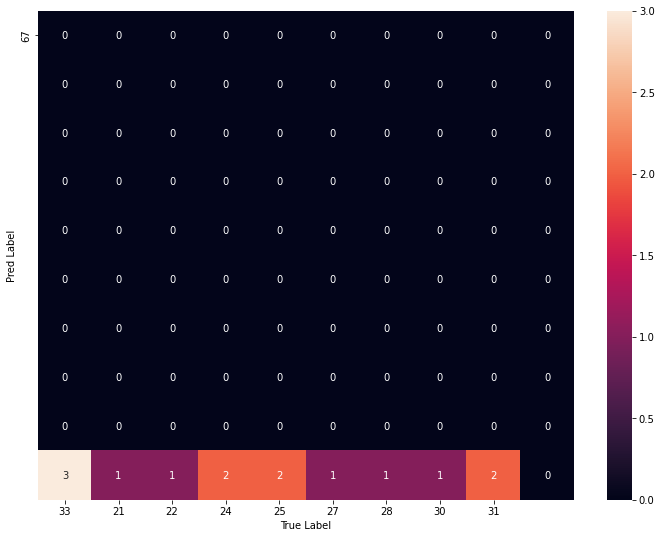

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(12,9))
cf_matrix = confusion_matrix(Y_pred, Y)
sns.heatmap(cf_matrix, annot=True, xticklabels=set(Y), yticklabels=set(Y_pred))
plt.xlabel("True Label")
plt.ylabel("Pred Label")

In [ ]:
Y

[22, 21, 30, 33, 27, 24, 25, 28, 21, 21, 33, 25, 31, 27]